In [18]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from PIL import Image
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r'C:\Users\vishw\Desktop\ASL\gesture\train'
test_path = r'C:\Users\vishw\Desktop\ASL\gesture\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=14,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=14, shuffle=True)

Found 7505 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


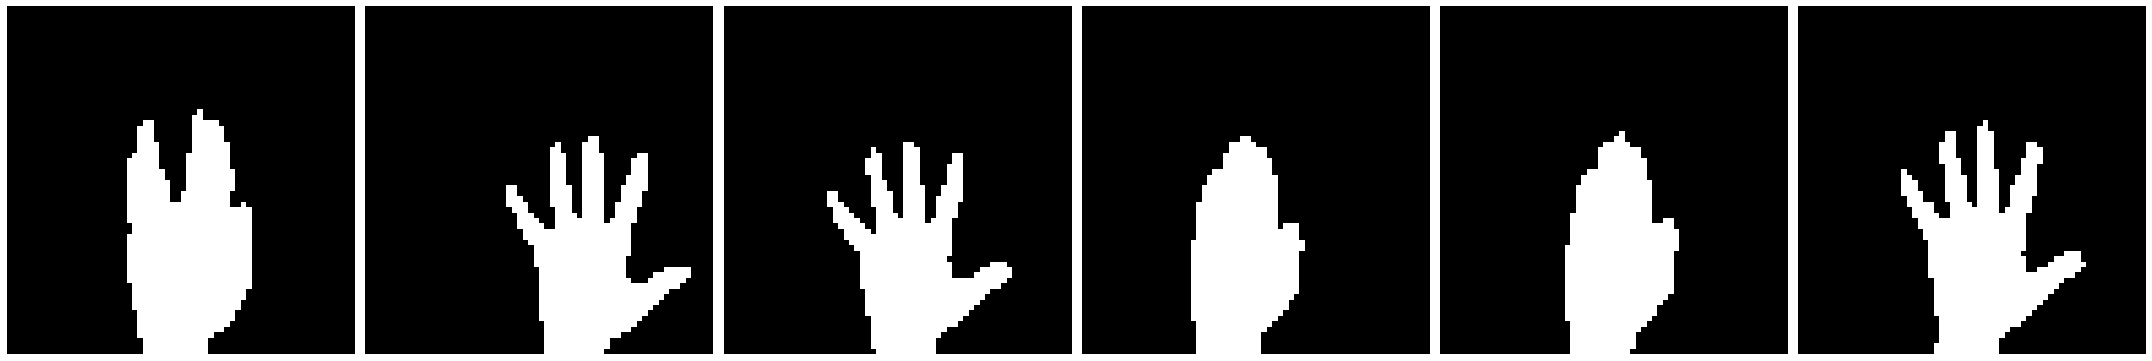

(14, 64, 64, 3)
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [20]:
imgs, labels = next(train_batches)
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1,6 , figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)


In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(5,activation ="softmax"))

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [23]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

Epoch 1/10
537/537 [==============================] - 17s 33ms/step - loss: 0.1950 - accuracy: 0.9777 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2/10
537/537 [==============================] - 18s 33ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
537/537 [==============================] - 18s 33ms/step - loss: 5.7005e-04 - accuracy: 1.0000 - val_loss: 1.5106e-04 - val_accuracy: 1.0000
Epoch 4/10
537/537 [==============================] - 17s 33ms/step - loss: 3.8110e-04 - accuracy: 1.0000 - val_loss: 2.7219e-04 - val_accuracy: 1.0000
Epoch 5/10
537/537 [==============================] - 18s 33ms/step - loss: 3.0010e-04 - accuracy: 1.0000 - val_loss: 1.2992e-04 - val_accuracy: 1.0000
Epoch 6/10
537/537 [==============================] - 18s 33ms/step - loss: 2.6342e-04 - accuracy: 1.0000 - val_loss: 7.9082e-04 - val_accuracy: 1.0000
Epoch 7/10
537/537 [==============================] - 18s 33ms/step - loss: 2.3459e-04 - accuracy: 1.000

In [24]:
# For getting next batch of testing imgs...
imgs, labels = next(test_batches) 

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


#Once the model is fitted we save the model using model.save()  function.


model.save('trained_model.h5')

loss of 0.00010888996621361002; accuracy of 100.0%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predictions on a small set of test data--

Vulcan Salute   I Hate You   Good Job   Vulcan Salute   Vulcan Salute   Good Job   High Five   I Hate You   Good Job   I Hate You   Vulcan Salute   High Five   Hello   Vulcan Salute   

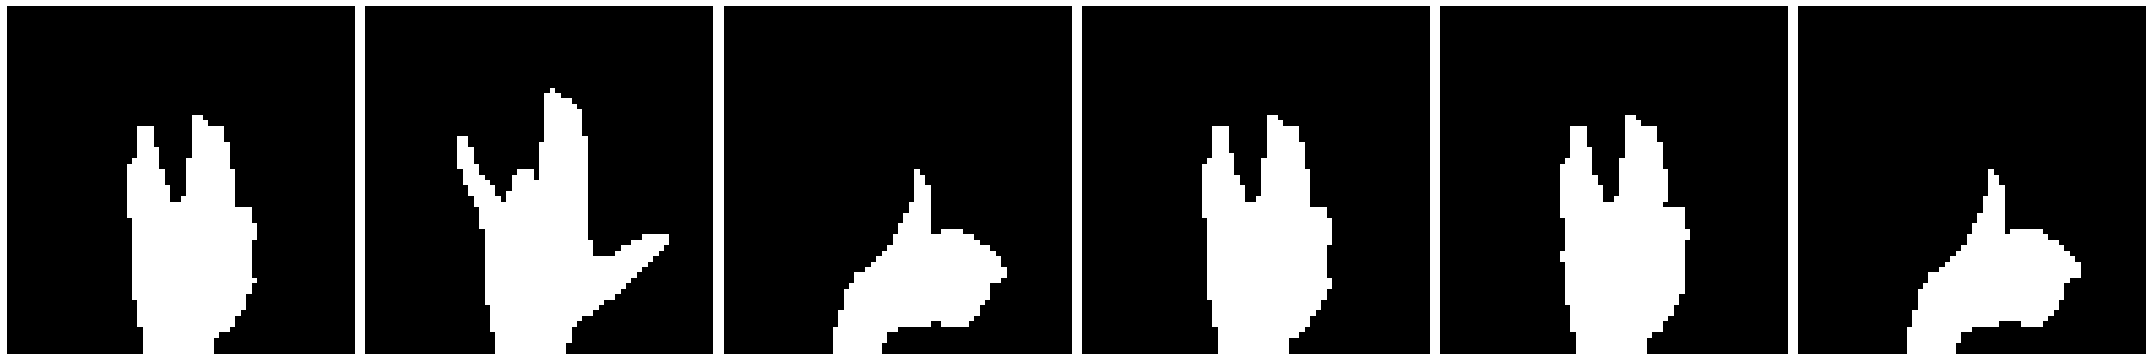

Actual labels
Vulcan Salute   I Hate You   Good Job   Vulcan Salute   Vulcan Salute   Good Job   High Five   I Hate You   Good Job   I Hate You   Vulcan Salute   High Five   Hello   Vulcan Salute   

In [25]:
word_dict = {0:'Good Job',1:'Hello',2:'High Five',3:'I Hate You',4:'Vulcan Salute'}
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')